In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tabulate import tabulate
import warnings

warnings.filterwarnings("ignore")

Dataset Overview:

+---+-------------------+------------------+-------------------+------------------+--------+---------+
|   | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | target | species |
+---+-------------------+------------------+-------------------+------------------+--------+---------+
| 0 |        5.1        |       3.5        |        1.4        |       0.2        |   0    | Setosa  |
| 1 |        4.9        |       3.0        |        1.4        |       0.2        |   0    | Setosa  |
| 2 |        4.7        |       3.2        |        1.3        |       0.2        |   0    | Setosa  |
| 3 |        4.6        |       3.1        |        1.5        |       0.2        |   0    | Setosa  |
| 4 |        5.0        |       3.6        |        1.4        |       0.2        |   0    | Setosa  |
+---+-------------------+------------------+-------------------+------------------+--------+---------+


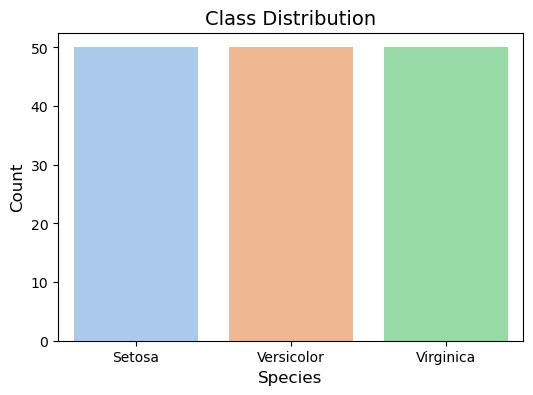

In [123]:
# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["species"] = df["target"].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})

# Display dataset overview
print("Dataset Overview:\n")
print(tabulate(df.head(), headers="keys", tablefmt="pretty"))

# Class distribution visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=df["species"], palette="pastel")
plt.title("Class Distribution", fontsize=14)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [125]:
# Check for missing values
print(" Missing values in dataset:\n", df.isnull().sum())

# Splitting Features and Target
X = df.iloc[:, :-2]  # Select all features (excluding target and species columns)
y = df["target"]  # Target labels

# Display table before scaling
df_before_scaling = pd.DataFrame(X, columns=X.columns)
print("\n Feature Values Before Scaling:\n")
display(df_before_scaling.head(5))

# Train-Test Split (before scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Only transform test data

# Convert scaled data back into DataFrame for better readability
df_after_scaling = pd.DataFrame(X_train_scaled, columns=X.columns)
print("\n Feature Values After Scaling (Training Set):\n")
display(df_after_scaling.head(5))  # Show first 5 rows after scaling

print("\n Data Preprocessing Completed! Feature scaling applied.")

 Missing values in dataset:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

 Feature Values Before Scaling:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



 Feature Values After Scaling (Training Set):



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.473937,1.203658,-1.562535,-1.312603
1,-0.133071,2.992376,-1.276006,-1.045633
2,1.085898,0.085709,0.385858,0.289218
3,-1.230143,0.756479,-1.218701,-1.312603
4,-1.717731,0.309299,-1.390618,-1.312603



 Data Preprocessing Completed! Feature scaling applied.



 Random Forest Accuracy: 1.0000

 Random Forest Classification Report:

+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|      0       |    1.0    |  1.0   |   1.0    |  10.0   |
|      1       |    1.0    |  1.0   |   1.0    |   9.0   |
|      2       |    1.0    |  1.0   |   1.0    |  11.0   |
|   accuracy   |    1.0    |  1.0   |   1.0    |   1.0   |
|  macro avg   |    1.0    |  1.0   |   1.0    |  30.0   |
| weighted avg |    1.0    |  1.0   |   1.0    |  30.0   |
+--------------+-----------+--------+----------+---------+


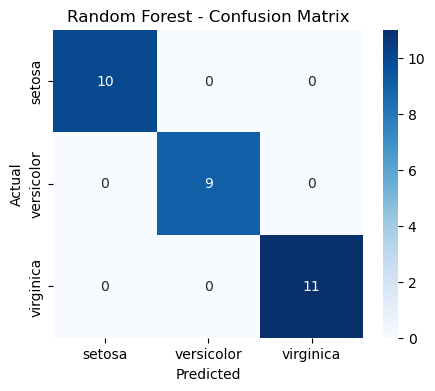

In [127]:
# Train Random Forest Model
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion="gini", random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
rf_pred = rf_clf.predict(X_test)

# Performance Metrics
rf_acc = metrics.accuracy_score(y_test, rf_pred)
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
rf_report = metrics.classification_report(y_test, rf_pred, output_dict=True)

print(f"\n Random Forest Accuracy: {rf_acc:.4f}")
print("\n Random Forest Classification Report:\n")
print(tabulate(pd.DataFrame(rf_report).T, headers="keys", tablefmt="pretty"))

# Confusion Matrix Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 SVM Accuracy: 1.0000

 SVM Classification Report:

+--------------+-----------+--------+----------+---------+
|              | precision | recall | f1-score | support |
+--------------+-----------+--------+----------+---------+
|      0       |    1.0    |  1.0   |   1.0    |  10.0   |
|      1       |    1.0    |  1.0   |   1.0    |   9.0   |
|      2       |    1.0    |  1.0   |   1.0    |  11.0   |
|   accuracy   |    1.0    |  1.0   |   1.0    |   1.0   |
|  macro avg   |    1.0    |  1.0   |   1.0    |  30.0   |
| weighted avg |    1.0    |  1.0   |   1.0    |  30.0   |
+--------------+-----------+--------+----------+---------+


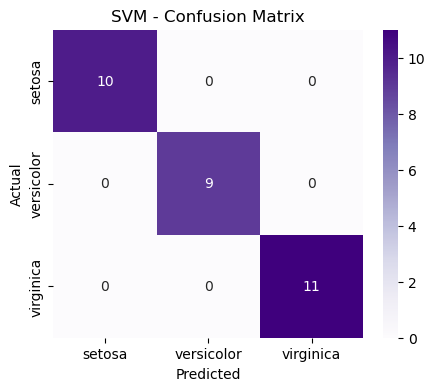

In [129]:
# Train SVM Model
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_clf.fit(X_train, y_train)

# Predictions
svm_pred = svm_clf.predict(X_test)

# Performance Metrics
svm_acc = metrics.accuracy_score(y_test, svm_pred)
svm_cm = metrics.confusion_matrix(y_test, svm_pred)
svm_report = metrics.classification_report(y_test, svm_pred, output_dict=True)

print(f"\n SVM Accuracy: {svm_acc:.4f}")
print("\n SVM Classification Report:\n")
print(tabulate(pd.DataFrame(svm_report).T, headers="keys", tablefmt="pretty"))

# Confusion Matrix Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(svm_cm, annot=True, cmap="Purples", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [131]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"\n Model: {model_name}")
    print("-" * 40)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\n Confusion Matrix:")
    display(pd.DataFrame(cm, columns=["Predicted 0", "Predicted 1", "Predicted 2"], 
                         index=["Actual 0", "Actual 1", "Actual 2"]))

    # Precision, Recall, F1-Score
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica']))

In [133]:
# Evaluate both models
evaluate_model(svm_clf, X_test_scaled, y_test, "Support Vector Machine")
evaluate_model(rf_clf, X_test_scaled, y_test, "Random Forest")


 Model: Support Vector Machine
----------------------------------------
 Accuracy: 0.1333

 Confusion Matrix:


,Predicted 0,Predicted 1,Predicted 2
Actual 0,4,0,6
Actual 1,7,0,2
Actual 2,10,1,0



 Classification Report:
              precision    recall  f1-score   support

      Setosa       0.19      0.40      0.26        10
  Versicolor       0.00      0.00      0.00         9
   Virginica       0.00      0.00      0.00        11

    accuracy                           0.13        30
   macro avg       0.06      0.13      0.09        30
weighted avg       0.06      0.13      0.09        30


 Model: Random Forest
----------------------------------------
 Accuracy: 0.3333

 Confusion Matrix:


,Predicted 0,Predicted 1,Predicted 2
Actual 0,10,0,0
Actual 1,9,0,0
Actual 2,11,0,0



 Classification Report:
              precision    recall  f1-score   support

      Setosa       0.33      1.00      0.50        10
  Versicolor       0.00      0.00      0.00         9
   Virginica       0.00      0.00      0.00        11

    accuracy                           0.33        30
   macro avg       0.11      0.33      0.17        30
weighted avg       0.11      0.33      0.17        30



In [135]:
# Predictions on test data
y_pred = rf_clf.predict(X_test)  # Ensure 'rf_clf' is used as trained classifier

# Compute Precision & Recall
precision = metrics.precision_score(y_test, y_pred, average="weighted")
recall = metrics.recall_score(y_test, y_pred, average="weighted")

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 1.0000
Recall: 1.0000


In [137]:
# Hyperparameter Tuning for Random Forest
rf_params = {
    "n_estimators": [10, 50, 100],
    "max_depth": [5, 10, None],
    "criterion": ["gini", "entropy"]
}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Hyperparameter Tuning for SVM
svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}
grid_svm = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("\n Best Parameters:")
print(f"🔹 Random Forest: {grid_rf.best_params_}")
print(f"🔹 SVM: {grid_svm.best_params_}")


 Best Parameters:
🔹 Random Forest: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 10}
🔹 SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [139]:
# Compare the optimized models
rf_best_acc = metrics.accuracy_score(y_test, grid_rf.best_estimator_.predict(X_test))
svm_best_acc = metrics.accuracy_score(y_test, grid_svm.best_estimator_.predict(X_test))

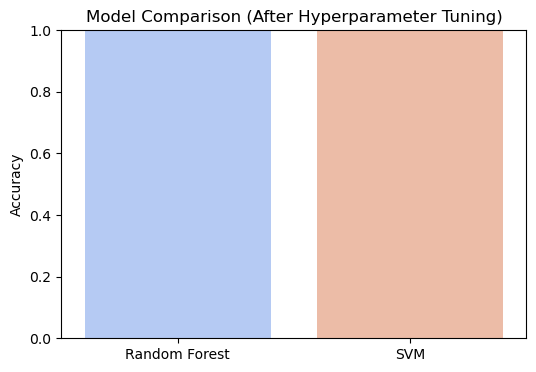

In [141]:
# Plot comparison
models = ["Random Forest", "SVM"]
accuracies = [rf_best_acc, svm_best_acc]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Comparison (After Hyperparameter Tuning)")
plt.show()